In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

2023-10-18 22:39:54.561648: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data() 

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
# Its a 3d array
# We have data of 60000 images with 28 by 28 numpy array

In [5]:
# Shape of 1st image
X_train[0].shape

(28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
X_test[0].shape

(28, 28)

In [8]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [9]:
y_test[0]

7

In [10]:
y_train.shape

(60000,)

In [11]:
y_train[7]

3

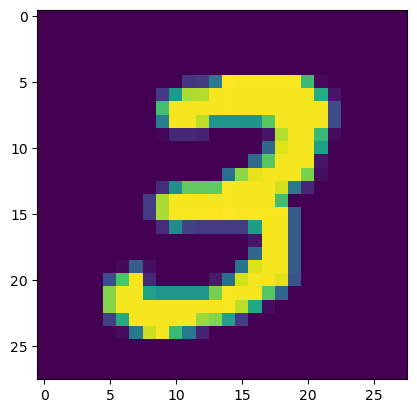

In [13]:
 import matplotlib.pyplot as plt
plt.imshow(X_train[7])

In [14]:
# For quick convergence we will scale the values so that values are between 0 & 1
X_train = X_train/255
X_test = X_test/255

In [15]:
# Using keras Flatten we will convert higher dimensional array into 1 dimensional

In [16]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation ="relu"))
model.add(Dense(32, activation ="relu"))
model.add(Dense(10, activation="softmax"))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "Adam",metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 42s 22ms/step - loss: 0.2806 - accuracy: 0.9193 - val_loss: 0.1368 - val_accuracy: 0.9584
Epoch 2/25
1500/1500 [==============================] - 34s 22ms/step - loss: 0.1190 - accuracy: 0.9645 - val_loss: 0.1160 - val_accuracy: 0.9665
Epoch 3/25
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0828 - accuracy: 0.9740 - val_loss: 0.1023 - val_accuracy: 0.9724
Epoch 4/25
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0609 - accuracy: 0.9815 - val_loss: 0.1025 - val_accuracy: 0.9718
Epoch 5/25
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0467 - accuracy: 0.9859 - val_loss: 0.0993 - val_accuracy: 0.9728
Epoch 6/25
 964/1500 [==================>...........] - ETA: 12s - loss: 0.0366 - accuracy: 0.9885

In [ ]:
y_prob = model.predict(X_test)
y_prob

In [ ]:
# Will give us the at wihich index prob has the max value
y_pred = y_prob.argmax(axis = 1)
y_pred

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [ ]:
plt.imshow(X_test[5])

In [ ]:
model.predict(X_test[5].reshape(1,28,28)).argmax(axis = 1)